# 2. Solving a Simple Linear Regression Model with a Mock Dataset, using Gradient Descent

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (25/11/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np

### Mock dataset generation

As in notebook 1.

In [2]:
# All helper functions
min_surf = 20
max_surf = 150
def surface(min_surf, max_surf):
    return round(np.random.uniform(20, 150))
def price(surface):
    return round((14373*surface)*(1 + np.random.uniform(-0.1, 0.1)))/1000000
def get_x_list(l):
    return [v[0] for v in l]
def get_y_list(l):
    return [v[1] for v in l]

In [3]:
# Dataset generation (n_points points will be generated).
# We will use a seed for reproducibility.
np.random.seed(47)
n_points = 50
dataset = [(s := surface(min_surf, max_surf), price(s)) for _ in range(n_points)]
inputs = get_x_list(dataset)
outputs = get_y_list(dataset)
print(inputs)
print(outputs)

[35, 115, 112, 104, 112, 53, 33, 103, 44, 55, 144, 117, 131, 92, 87, 90, 21, 105, 117, 67, 91, 43, 38, 81, 39, 89, 41, 33, 70, 93, 106, 144, 134, 53, 78, 136, 121, 83, 78, 99, 147, 129, 83, 139, 72, 103, 93, 61, 131, 132]
[0.550793, 1.603793, 1.706235, 1.469261, 1.528208, 0.68925, 0.455378, 1.427778, 0.68518, 0.754712, 1.915359, 1.515239, 1.956655, 1.43742, 1.169825, 1.240135, 0.325002, 1.642652, 1.603347, 0.968076, 1.244814, 0.600822, 0.534058, 1.273376, 0.562145, 1.22937, 0.600715, 0.480756, 0.922547, 1.376274, 1.428848, 1.887174, 2.035285, 0.826838, 1.093549, 2.054049, 1.870976, 1.145933, 1.127402, 1.430111, 2.15595, 1.700365, 1.28847, 1.884722, 1.044205, 1.472611, 1.360558, 0.921997, 1.874013, 1.958295]


### Linear Regression

Linear regression is a model, which assumes that there is a linear relationship between inputs $ x $ and outputs $ y $. It therefore consists of two parameters $ (a, b) $, which will connect any input $ x_i $ to its respective output $ y_i $, with the equation:

$$ y_i \approx a x_i + b $$

As in Notebook 1., we define the *linreg()* function, which produces a list of values to be used for display later.

In [4]:
# Linear regression has two trainable parameters (a and b).
# Other parameters, like min_surf, max_surf, n_points will
# help get points for the upcoming matplotlib displays.
def linreg(a, b, min_surf, max_surf, n_points = 50):
    return [(x, a*x + b) for x in np.linspace(min_surf, max_surf, n_points)]

### Loss function

In order to measure the quality of the parameters $ (a, b) $ used for the linear regression, we will use the same loss function as in Notebook 1., namely the mean square error  $ L(a, b, x, y) $:

$$ L(a, b, x, y) = \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 $$

With $ N $ being the number of points in the dataset (i.e. the value in the variable *n_points*).

In [5]:
# Mean square error as a loss function
def loss_mse(a, b, x, y):
    return sum([(y_i - (a*x_i + b))**2 for x_i, y_i in zip(x, y)])/len(x)

Below, we provide a full display with dataset entries, the three linear regressions and their loss values.

### Recap: Finding the optimal linear regression parameters, analytically

Let us define the matrix notations, below:

$$ W = \begin{pmatrix} b \\ a \end{pmatrix}, $$

$$ X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix}, $$

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, $$

In Notebook 1., we have shown how, using these notations, we could compute that the optimal values $ (a^*, b^*) $, or equivalently $ W^* $, as

$$ W^* = (X^T X)^{-1} X^T Y.$$

In [6]:
# Defining W_star according to our formula
X = np.array([[1, x_i] for x_i in inputs])
XT = np.transpose(X)
Y = np.array([[y_i] for y_i in outputs])
W_star = np.matmul(np.linalg.inv(np.matmul(XT,X)), np.matmul(XT,Y))
print(W_star)
b_star, a_star = W_star[0, 0], W_star[1, 0]
print("Optimal a_star value: ", a_star)
print("We used 14373/1000000 in the mock dataset generation, which is: ", 14373/1000000)
print("Optimal b_star value: ", b_star)
print("The value we used in the mock dataset generation: ", 0)

[[0.02458918]
 [0.01402749]]
Optimal a_star value:  0.014027488685199558
We used 14373/1000000 in the mock dataset generation, which is:  0.014373
Optimal b_star value:  0.024589183127232947
The value we used in the mock dataset generation:  0


Finally, we provide a final display, showing the optimal linear regression model, in magenta, below.

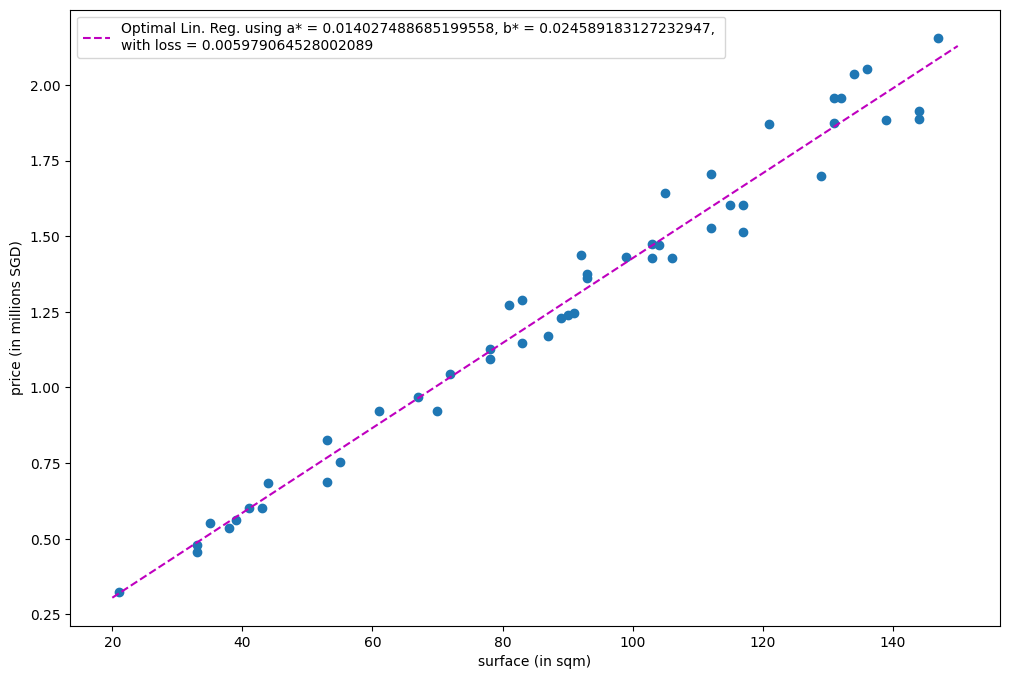

In [7]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Optimal linreg
linreg_dataset4 = linreg(a_star, b_star, min_surf, max_surf, n_points)
loss4 = loss_mse(a_star, b_star, inputs, outputs)
legend4 = "Optimal Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_star, b_star, loss4)
plt.plot(get_x_list(linreg_dataset4), get_y_list(linreg_dataset4), 'm--', label = legend4)

# Display
plt.legend(loc='best')
plt.show()

### Using Gradient Descent to Compute the Optimal Linear Regression Parameters

The formula $ W^* = (X^T X)^{-1} X^T Y $, while being the correct analytical one, suffers from one major issue: it relies on huge matrices $ X $ and $ Y $, and requires inverting a matrix, which can prove to be costly, especially when the number of entries in the dataset, *n_points*, grows large.

As such, it is often preferable to find a heuristic way to approximate the $ W^* $ parameters.

The typical approach consists of using gradient descent on the loss function $ L(a, b, x, y) = \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 $ we defined earlier, to find the optimal parameters for the linear regression model.

For this loss function, we have the following partial derivatives, with respect to $ a $ and $ b $:
$$ D_a = \frac{\partial L}{\partial a}  = \frac{-2}{N} \sum_{i = 1}^{N} x_i (y_i - (a x_i + b)) $$
$$ D_b = \frac{\partial L}{\partial b}  = \frac{-2}{N} \sum_{i = 1}^{N} (y_i - (a x_i + b)) $$

Our update rules for the gradient descent are therefore defined below, with $ \rho $ being the learning rate for the gradient descent, a parameter to be decided.
$$ a \leftarrow a - \rho D_a $$
$$ b \leftarrow b - \rho D_b $$

We will repeat these iterations, until a convergence is observed on both a and b, and then return their final values.

Our gradient descent function is therefore implemented below.

In [8]:
def gradient_descent_linreg(a_0, b_0, x, y, rho = 0.0001, stop = 0.000001):
    # Define the initial values of a and b as a_0 and b_0
    a, b = a_0, b_0
    # Define N as the number of elements in the dataset
    N = len(x)
    # Keep track of how much a and b changed on each iteration
    change = float("Inf")
    while abs(change) > stop:
        # Helper to visualize iterations of while loop
        print("-----")
        # Use gradident descent update rules for a and b
        D_a = -2*rho/N*(sum([x_i*(y_i - (a*x_i + b)) for x_i, y_i in zip(x, y)]))
        D_b = 2*rho/N*(sum([(y_i - (a*x_i + b)) for x_i, y_i in zip(x, y)]))
        a = a - D_a
        b = b - D_b
        print("Gradients: ", D_a, D_b)
        print("New values for (a, b): ", a, b)
        # Compute change
        change = max(abs(D_a), abs(D_b))
        print("Change: ", change)
    return a, b

In [9]:
a_gd, b_gd = gradient_descent_linreg(a_0 = 0, b_0 = 0, x = inputs, y = outputs, rho = 0.0001, stop = 0.000001)

-----
Gradients:  -0.026308210535999993 0.000256122104
New values for (a, b):  0.026308210535999993 -0.000256122104
Change:  0.026308210535999993
-----
Gradients:  0.022201752947430573 -0.00021495410585788778
New values for (a, b):  0.00410645758856942 -4.11679981421122e-05
Change:  0.022201752947430573
-----
Gradients:  -0.01873629503675128 0.00018259189510352728
New values for (a, b):  0.0228427526253207 -0.00022375989324563948
Change:  0.01873629503675128
-----
Gradients:  0.015811737004143653 -0.000152901158035594
New values for (a, b):  0.007031015621177045 -7.085873521004549e-05
Change:  0.015811737004143653
-----
Gradients:  -0.013343696063467494 0.0001302248480030035
New values for (a, b):  0.02037471168464454 -0.000201083583213049
Change:  0.013343696063467494
-----
Gradients:  0.011260868281457866 -0.00010870801613197179
New values for (a, b):  0.009113843403186673 -9.23755670810772e-05
Change:  0.011260868281457866
-----
Gradients:  -0.009503171999333194 9.292987144914928e-0

Using a final display, we can check that the values found by gradient descent are very close to the theoretical optimum, but they do not require heavy matrix computations.

In [10]:
print("Optimal a_star value: ", a_star)
print("Value for a_star, found by gradient descent: ", a_gd)
print("We used 14373/1000000 in the mock dataset generation, which is: ", 14373/1000000)
print("Optimal b_star value: ", b_star)
print("Value for b_star, found by gradient descent: ", b_gd)
print("The value we used in the mock dataset generation: ", 0)

Optimal a_star value:  0.014027488685199558
Value for a_star, found by gradient descent:  0.014267622164668124
We used 14373/1000000 in the mock dataset generation, which is:  0.014373
Optimal b_star value:  0.024589183127232947
Value for b_star, found by gradient descent:  -0.00017858944705569207
The value we used in the mock dataset generation:  0


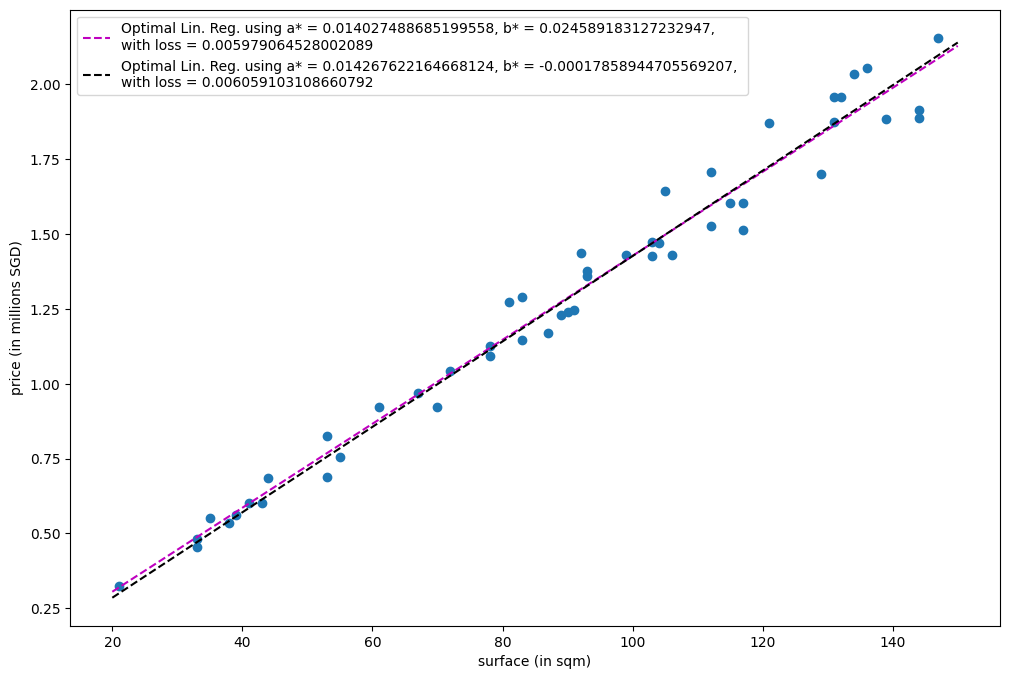

In [11]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Optimal linreg
linreg_dataset = linreg(a_star, b_star, min_surf, max_surf, n_points)
loss = loss_mse(a_star, b_star, inputs, outputs)
legend = "Optimal Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_star, b_star, loss)
plt.plot(get_x_list(linreg_dataset), get_y_list(linreg_dataset), 'm--', label = legend)

# Gradient Descent linreg
linreg_dataset = linreg(a_gd, b_gd, min_surf, max_surf, n_points)
loss2 = loss_mse(a_gd, b_gd, inputs, outputs)
legend2 = "Optimal Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_gd, b_gd, loss2)
plt.plot(get_x_list(linreg_dataset), get_y_list(linreg_dataset), 'k--', label = legend2)

# Display
plt.legend(loc='best')
plt.show()